# Circuiti 1

In [1]:
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import chi2
import matplotlib.pyplot as plt
from uncertainties import ufloat
import uncertainties.umath as uu

### Misura resistanza interna voltmetro e amperometro

In [2]:
#amperometro
R_senzaerr = np.array([10, 110, 200, 300, 400, 1000, 2000, 238, 168, 3000, 100, 70, 43, 30, 200]) #ohm (errore 1% + 0.2 ohm)
R = []
for i in range(len(R_senzaerr)):
    R.append( ufloat(R_senzaerr[i], R_senzaerr[i] * 0.01 + 0.2) )


V_senzaerr = np.array([0.1, 0.1, 1, 1, 1, 0.6, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1]) #volt
V = []
for i in range(len(V_senzaerr)):
    V.append( ufloat(V_senzaerr[i], V_senzaerr[i] * 0.01) )

I_senzaerr = np.array([0.9593, 0.5017, 3.3891, 2.5475, 2.0320, 0.5582, 0.48695, 1.5006, 1.8984, 0.16428, 2.5316, 2.9802, \
                       3.5451, 3.8894, 3.3727]) #milliampere
I = []
for i in range(len(I_senzaerr)):
    I.append( ufloat(I_senzaerr[i], I_senzaerr[i] * 0.01) )

R_amp = []
for i in range(len(R)):
    R_amp.append( V[i]/(I[i] * 10 ** (-3)) - R[i] )

for i in range(len(R_amp)):
    print(R_amp[i])

94.2+/-1.5
89.3+/-3.1
95+/-5
93+/-6
92+/-8
75+/-18
54+/-35
95+/-5
95+/-4
(4+/-5)e+01
97.5+/-3.0
97.8+/-2.5
98.0+/-2.1
98.6+/-1.9
96+/-5


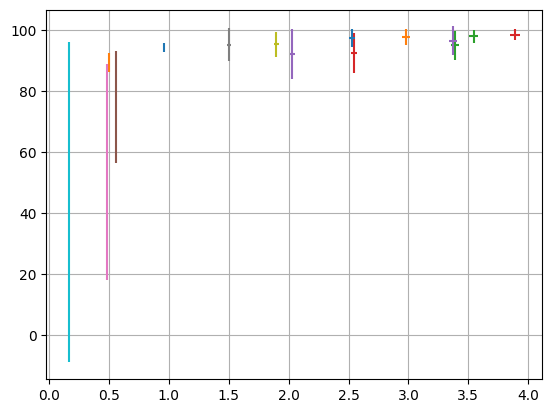

In [3]:
fig,ax = plt.subplots(1,1)
for i in range(len(R_amp)):
    plt.errorbar(I[i].nominal_value, R_amp[i].nominal_value, xerr=I[i].std_dev, yerr=R_amp[i].std_dev)
plt.grid()
plt.show()

In [4]:
R = np.delete(R, (5,6,9))
I = np.delete(I, (5,6,9))
V = np.delete(V, (5,6,9))

R_amp = []
for i in range(len(R)):
    R_amp.append( V[i]/(I[i] * 10 ** (-3)) - R[i] )
    print(R_amp[i])

sum = 0
for i in range(len(R_amp)):
    sum = sum + R_amp[i]

R_amp_mean = sum / len(R_amp)

94.2+/-1.5
89.3+/-3.1
95+/-5
93+/-6
92+/-8
95+/-5
95+/-4
97.5+/-3.0
97.8+/-2.5
98.0+/-2.1
98.6+/-1.9
96+/-5


In [5]:
#voltmetro
R_senzaerr = np.array([2, 3, 4, 5, 6, 7]) #megaohm (errore 1% + 0.2 ohm)
R = []
for i in range(len(R_senzaerr)):
    R.append( ufloat(R_senzaerr[i], R_senzaerr[i] * 0.01 + 0.2) )


V_senzaerr = np.array([5, 5, 5, 5, 5, 5]) #volt
V = []
for i in range(len(V_senzaerr)):
    V.append( ufloat(V_senzaerr[i], V_senzaerr[i] * 0.01) )

I_senzaerr = np.array([2.99, 2.15, 1.72, 1.48, 1.3, 1.19]) #microampere
I = []
for i in range(len(I_senzaerr)):
    I.append( ufloat(I_senzaerr[i], I_senzaerr[i] * 0.01) )

R_vol = []
for i in range(len(R)):
    R_eq = V[i] / (I[i] * 10 ** (-6))
    R_vol.append( (R[i] * 10 ** 6) * R_eq / ((R[i] * 10 ** 6) - R_eq) )

print(R_vol)

sum = 0
for i in range(len(R_vol)):
    sum = sum + R_vol[i]

R_vol_mean = sum / len(R_vol)
print(R_vol_mean)

[10204081.63265306+/-5794084.831167873, 10344827.586206904+/-2811201.4017820717, 10638297.872340431+/-1784652.0077690075, 10416666.666666664+/-1176303.3612979795, 10714285.714285713+/-930346.3357569997, 10510510.510510515+/-713295.6146482024]
(1.05+/-0.11)e+07


### Legge di Ohm

In [6]:
R =  997 #ohm
V = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]) #volt
I = np.array([0.9259, 1.3871, 1.8534, 2.3151, 2.7773, 3.2393, 3.7017, 4.1639, 4.6258]) * 10 ** (-3) #ampere
I_err = 3 * 10 ** (-6)

In [7]:
def model(x, R):
    return V / R

minimi_quadrati = LeastSquares(V, I, I_err, model)

m = Minuit(minimi_quadrati, R=1)

m.migrad()
m.hesse()
display(m)

R_fit = m.values["R"]
R_err = m.errors["R"] 

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.471 (χ²/ndof = 0.2)      │              Nfcn = 107              │
│ EDM = 2.73e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │ 1.0805e3  │ 0.0004e3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┐
│   │     R │
├───┼───────┤
│ R │ 0.128 │
└───┴───────┘

p value: 0.9931858234510746


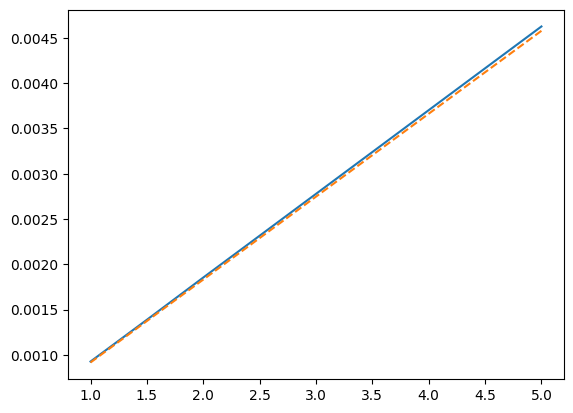

In [8]:
fig,ax = plt.subplots(1,1)
plt.plot(V, I)
x = np.linspace(min(V), max(V), 10000)
y = x / (R_amp_mean.nominal_value + R)
plt.plot(x,y,linestyle='--')
plt.show()

In [9]:
R_eq1 = R + R_amp_mean #calcolata con multimetro
R_eq2 = 1000 + R_amp_mean #data

t1 = (R_fit - R_eq1.nominal_value) / np.sqrt(R_err**2 + R_eq1.std_dev**2)
t2 = (R_fit - R_eq2.nominal_value) / np.sqrt(R_err**2 + R_eq2.std_dev**2)
print(t1, t2)

-8.80075295105149 -11.068567897265844


In [10]:
R_res = R_fit - R_amp_mean #resistenza calcolata con il fit
print(R_res)

985.4+/-1.3


### Resistenze in serie

In [11]:
R = 997 #ohm
V = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]) #volt
I = np.array([484.75, 728.6, 970.8, 1209.7, 1451.5, 1695.6, 1937.5, 2181.5, 2420.7, 2665.1]) * 10 ** (-6) #ampere
I_err = 3 * 10 ** (-6)

In [12]:
def model(x, R):
    return V / R

minimi_quadrati = LeastSquares(V, I, I_err, model)

m = Minuit(minimi_quadrati, R=1)

m.migrad()
m.hesse()
display(m)

R_fit = m.values["R"]
R_err = m.errors["R"] 

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.99 (χ²/ndof = 0.2)       │              Nfcn = 114              │
│ EDM = 1.29e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │ 2.0642e3  │ 0.0011e3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────┐
│   │    R │
├───┼──────┤
│ R │ 1.29 │
└───┴──────┘

p value: 0.9916218996787297


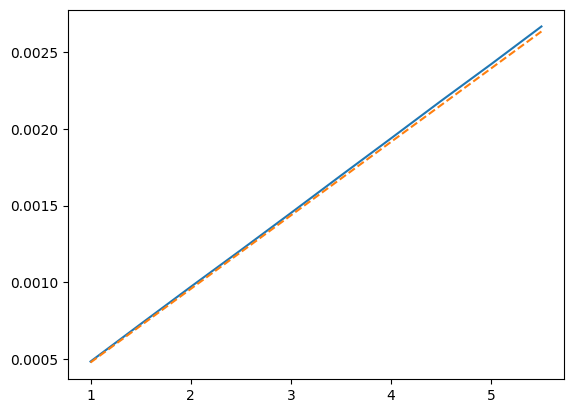

In [13]:
fig,ax = plt.subplots(1,1)
plt.plot(V, I)
x = np.linspace(min(V), max(V), 10000)
y = x / (R_amp_mean.nominal_value + (2*R))
plt.plot(x,y,linestyle='--')
plt.show()

In [14]:
R_eq1 = R*2 + R_amp_mean #calcolata con multimetro
R_eq2 = 1000*2 + R_amp_mean #data
R_eq3 = R_res*2 + R_amp_mean #ricavata dal fit

t1 = (R_fit - R_eq1.nominal_value) / np.sqrt(R_err**2 + R_eq1.std_dev**2)
t2 = (R_fit - R_eq2.nominal_value) / np.sqrt(R_err**2 + R_eq2.std_dev**2)
t3 = (R_fit - R_eq3.nominal_value) / np.sqrt(R_err**2 + R_eq3.std_dev**2)
print(t1, t2, t3)

-14.617926507014664 -18.131293292802418 -0.9835366465179769


### Resistenze in parallelo

In [15]:
R = 997 #ohm
V = np.array([0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]) #volt
I = np.array([423, 849.8, 1277, 1695.3, 2121.2, 2539, 2965.6, 3394.2, 3811.5, 4246]) * 10 ** (-6) #ampere
I_err = 3 * 10 ** (-6)

In [16]:
def model(x, R):
    return V / R

minimi_quadrati = LeastSquares(V, I, I_err, model)

m = Minuit(minimi_quadrati, R=1)

m.migrad()
m.hesse()
display(m)

R_fit = m.values["R"]
R_err = m.errors["R"] 

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 13.63 (χ²/ndof = 1.5)      │              Nfcn = 100              │
│ EDM = 5.17e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │  589.58   │   0.21    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────┐
│   │      R │
├───┼────────┤
│ R │ 0.0452 │
└───┴────────┘

p value: 0.1359772044499148


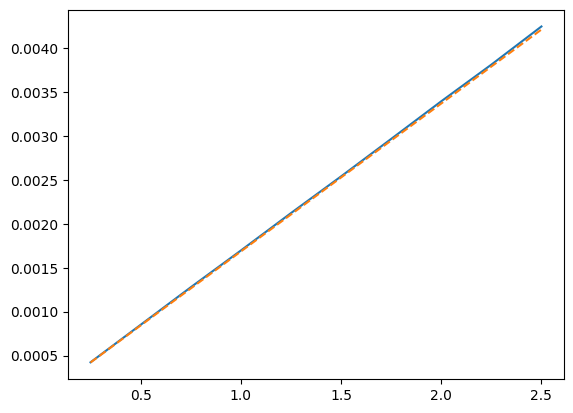

In [17]:
fig,ax = plt.subplots(1,1)
plt.plot(V, I)
x = np.linspace(min(V), max(V), 10000)
y = x / (R_amp_mean.nominal_value + (R/2))
plt.plot(x,y,linestyle='--')
plt.show()

In [18]:
R_eq1 = R/2 + R_amp_mean #calcolata con multimetro
R_eq2 = 1000/2 + R_amp_mean #data
R_eq3 = R_res/2 + R_amp_mean #ricavata dal fit

t1 = (R_fit - R_eq1.nominal_value) / np.sqrt(R_err**2 + R_eq1.std_dev**2)
t2 = (R_fit - R_eq2.nominal_value) / np.sqrt(R_err**2 + R_eq2.std_dev**2)
t3 = (R_fit - R_eq3.nominal_value) / np.sqrt(R_err**2 + R_eq3.std_dev**2)
print(t1, t2, t3)

-3.1799677856398523 -4.341625791792929 2.5543768230579675


### Partitore resitivo

$\alpha = \frac{R_2}{R_1 + R_2}$

quindi per avere $\alpha = 0.5$, deve essere $R_1 = R_2$

In [19]:
R = 997 #ohm
Vin = np.array([1, 2, 3, 4, 5]) #volt
Vout = np.array([0.51, 1.013, 1.522, 2.029, 2.537]) #volt
V_err = 0.002
print(Vout / Vin)

[0.51       0.5065     0.50733333 0.50725    0.5074    ]


In [20]:
def model(x, alpha):
    return alpha * x

minimi_quadrati = LeastSquares(Vin, Vout, V_err, model)

m = Minuit(minimi_quadrati, alpha=0.5)

m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.527 (χ²/ndof = 0.6)      │              Nfcn = 20               │
│ EDM = 2.55e-14 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │ 507.33e-3 │  0.27e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────┐
│       │    alpha │
├───────┼──────────┤
│ alpha │ 7.27e-08 │
└───────┴──────────┘

p value: 0.6397589379957006


## Diodo

### Prova 1

configurazione II

In [21]:
V = np.array([0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]) #volt
I = np.array([0.35 * 10 ** (-6), 1.75 * 10 ** (-6), 7.02 * 10 ** (-6), 34.57 * 10 ** (-6), 101.96 * 10 ** (-6), \
              266.55 * 10 ** (-6), 475.20 * 10 ** (-6), 0.7733 * 10 ** (-3), 1.0909 * 10 ** (-3), 1.5022 * 10 ** (-3), \
              1.9036 * 10 ** (-3), 2.2827 * 10 ** (-3), 2.712 * 10 ** (-3), 3.1533 * 10 ** (-3), 3.6035 * 10 ** (-3), \
                ]) #ampere
I_err = I * 0.05

V_eff = V - R_amp_mean.nominal_value * I
cost = 38.6

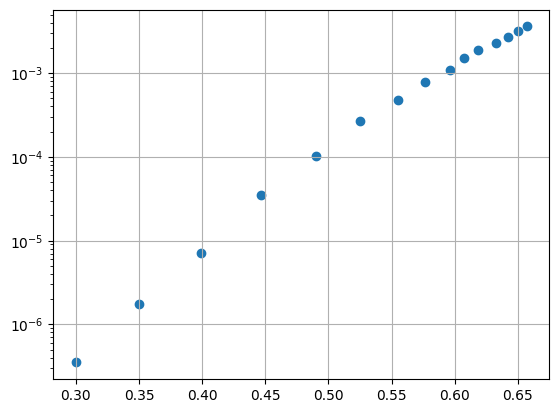

In [22]:
fig,ax = plt.subplots(1,1)
plt.scatter(V_eff, I)
ax.set_yscale('log')
plt.grid()
plt.show()

In [23]:
V_eff = np.delete(V_eff, (12,13,14))
I = np.delete(I, (12,13,14))
I_err = np.delete(I_err, (12,13,14))


def model(x, I0, a):
    return I0 * (np.e**(a * x) - 1)

minimi_quadrati = LeastSquares(V_eff, I, I_err, model)

m = Minuit(minimi_quadrati, I0=1, a=1)

m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2112 (χ²/ndof = 211.2)     │              Nfcn = 521              │
│ EDM = 6.45e+04 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ I0   │  1.3e-9   │  0.4e-9   │            │            │         │         │       │
│ 1 │ a    │   20.8    │    1.2    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────┐
│    │                I0                 a │
├────┼─────────────────────────────────────┤
│ I0 │          1.61e-19 -499.21826012e-12 │
│  a │ -499.21826012e-12              1.56 │
└────┴─────────────────────────────────────┘

p value: 0.0


In [24]:
g = cost / m.values["a"]
print(g)

1.8520520928326134


[-18.61188065  -1.86044876   4.70382567  11.66082785  12.98663121
  14.51279962  14.23153492  14.4367931   14.04580116  14.57893328
  14.53020984  13.90400453]


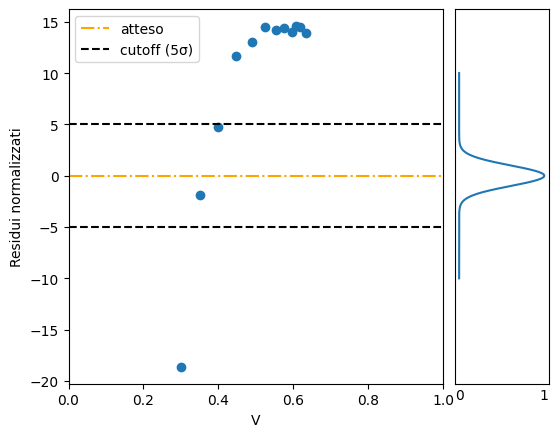

In [25]:
def mostra_residui(I, I_err, model, I0, a, V):
    residuals = (I - model(V,I0,a))/I_err

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(V, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.hlines(5,0,len(V),color='black',linestyle='--',label='cutoff (5σ)')
    ax.hlines(-5,0,len(V),color='black',linestyle='--')
    ax.set_xlabel("V")
    ax.set_xlim(0, 1)
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-10, 10, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    print(residuals)

mostra_residui(I, I_err, model, m.values["I0"], m.values["a"], V_eff)

In [26]:
V_eff = np.delete(V_eff, (0,3,4,5,11))
I = np.delete(I, (0,3,4,5,11))
I_err = np.delete(I_err, (0,3,4,5,11))


def model(x, I0, a):
    return I0 * (np.e**(a * x) - 1)

minimi_quadrati = LeastSquares(V_eff, I, I_err, model)

m = Minuit(minimi_quadrati, I0=1, a=1)

m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 24.26 (χ²/ndof = 4.9)      │              Nfcn = 436              │
│ EDM = 1.05e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ I0   │ 0.201e-9  │ 0.019e-9  │            │            │         │         │       │
│ 1 │ a    │   26.12   │   0.18    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────┐
│    │                I0                 a │
├────┼─────────────────────────────────────┤
│ I0 │          3.78e-22 -3.4249837528e-12 │
│  a │ -3.4249837528e-12            0.0323 │
└────┴─────────────────────────────────────┘

p value: 0.0001933524243182827


### Prova 2

configurazione II


In [27]:
V2 = np.array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1]) #volt
I2 = np.array([0.11 * 10 ** (-6), 3.09 * 10 ** (-6), 60.5 * 10 ** (-6), 388.60 * 10 ** (-6), 1.0230 * 10 ** (-3), \
                1.8040 * 10 ** (-3), 2.6698 * 10 ** (-3), 3.5330 * 10 ** (-3), 4.4075 * 10 ** (-3)]) #ampere
I_err2 = np.array([0.01 * 10 ** (-6), 0.03 * 10 ** (-6), 0.5 * 10 ** (-6), 0.5 * 10 ** (-6), 0.0001 * 10 ** (-3), \
                0.0005 * 10 ** (-3), 0.002 * 10 ** (-3), 0.01 * 10 ** (-3), 0.01 * 10 ** (-3)]) #ampere

V_eff2 = V2 - R_amp_mean.nominal_value * I2
cost = 38.6

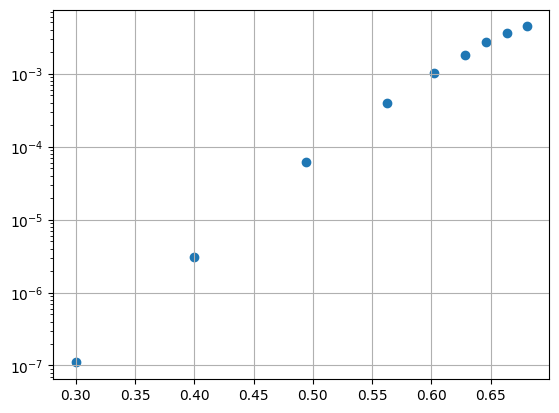

In [28]:
fig,ax = plt.subplots(1,1)
plt.scatter(V_eff2, I2)
ax.set_yscale("log")
plt.grid()
plt.show()

### Prova 3

configurazione I


In [29]:
V3 = np.array([0.309, 0.412, 0.507, 0.573, 0.612, 0.634, 0.648, 0.660, 0.670, 0.835, 0.850, 0.711, 0.748, 0.757, 0.769, 0.779, \
               0.789, 0.802, 0.510, 0.521, 0.529, 0.537, 0.681, 0.691, 0.702, 0.719, 0.733, 0.806, 0.819, 0.558, 0.570, 0.579, \
                0.590, 0.598, 0.620, 0.630, 0.637, 0.649, 0.658, 0.665, 0.670, 0.682, 0.508, 0.521, 0.533, 0.548, 0.721, 0.736, \
                0.744, 0.751, 0.762, 0.773, 0.411, 0.421, 0.431, 0.446, 0.451, 0.461, 0.471, 0.485, 0.495, 0.517, 0.525, 0.541]) #volt
I3 = np.array([0.13 * 10 ** (-6), 3.46 * 10 ** (-6), 64.37 * 10 ** (-6), 377.50 * 10 ** (-6), 1.0133 * 10 ** (-3), 1.8091 * 10 ** (-3), \
               2.6284 * 10 ** (-3), 3.5305 * 10 ** (-3), 4.5020 * 10 ** (-3), 230 * 10 ** (-3), 279 * 10 ** (-3), \
                13.500 * 10 ** (-3), 32.2 * 10 ** (-3), 41.150 * 10 ** (-3), 55.42 * 10 ** (-3), 71.12 * 10 ** (-3), \
                90.30 * 10 ** (-3), 126.32 * 10 ** (-3), 62.50 * 10 ** (-6), 83.75 * 10 ** (-6), 105.1 * 10 ** (-6), 128.3 * 10 ** (-6), \
                6.6 * 10 ** (-3), 7.38 * 10 ** (-3), 9.83 * 10 ** (-3), 15.056 * 10 ** (-3), 21.720 * 10 ** (-3), 118.50 * 10 ** (-3), \
                148.5 * 10 ** (-3), 221 * 10 ** (-6), 304 * 10 ** (-6), 387.6 * 10 ** (-6), 0.5179 * 10 ** (-3), 0.654 * 10 ** (-3), \
                1.1335 * 10 ** (-3), 1.4899 * 10 ** (-3), 1.7769 * 10 ** (-3), 2.4230 * 10 ** (-3), 3.0923 * 10 ** (-3), 3.6375 * 10 ** (-3), \
                4.1540 * 10 ** (-3), 5.87 * 10 ** (-3), 58.65 * 10 ** (-6), 83.8 * 10 ** (-6), 116.81 * 10 ** (-6), 172.5 * 10 ** (-6), \
                16.4 * 10 ** (-3), 22.93 * 10 ** (-3), 27.594 * 10 ** (-3), 32.694 * 10 ** (-3), 41.8 * 10 ** (-3), 53.7 * 10 ** (-3), \
                4.20 * 10 ** (-6), 4.72 * 10 ** (-6), 6.30 * 10 ** (-6), 9.89 * 10 ** (-6), 11.44 * 10 ** (-6), 15.44 * 10 ** (-6), \
                20.56 * 10 ** (-6), 31.08 * 10 ** (-6), 40.73 * 10 ** (-6), 75.3 * 10 ** (-6), 93.82 * 10 ** (-6), 142.1 * 10 ** (-6)]) #ampere

'''I_err3 = np.array([0.01 * 10 ** (-6), 0.01 * 10 ** (-6), 0.03 * 10 ** (-6), 0.8 * 10 ** (-6), 0.0002 * 10 ** (-3), 0.0002 * 10 ** (-3), \
                0.0001 * 10 ** (-3), 0.0005 * 10 ** (-3), 0.001 * 10 ** (-3), 1 * 10 ** (-3), 0.5 * 10 ** (-3), 0.5 * 10 ** (-3), \
                0.1 * 10 ** (-3), 0.2 * 10 ** (-3), 0.03 * 10 ** (-3), 0.04 * 10 ** (-3), ]) #ampere'''
I_err3perc = I3 * 0.05

cost = 38.6

In [30]:
print(len(I3))

64


In [31]:
def model(x, I0, a):
    return I0 * (np.e**(a * x) - 1)

minimi_quadrati = LeastSquares(V3, I3, I_err3perc, model)

m = Minuit(minimi_quadrati, I0=10**(-12), a=20)

m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 995.8 (χ²/ndof = 16.1)     │              Nfcn = 188              │
│ EDM = 2.3e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ I0   │ 68.3e-12  │  1.7e-12  │            │            │         │         │       │
│ 1 │ a    │   26.63   │   0.04    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────────────┐
│    │                 I0                  a │
├────┼───────────────────────────────────────┤
│ I0 │           2.88e-24 -63.2540866705e-15 │
│  a │ -63.2540866705e-15            0.00149 │
└────┴───────────────────────────────────────┘

p value: 0.0


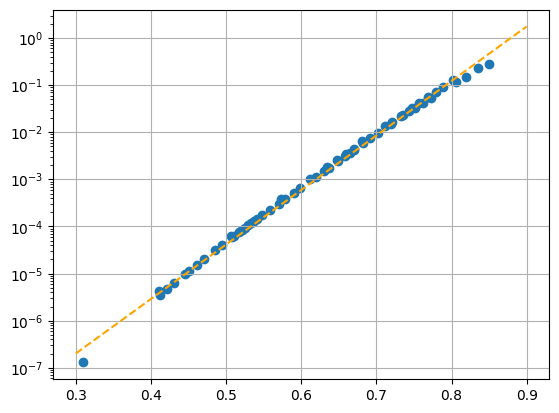

In [32]:
fig,ax = plt.subplots(1,1)
plt.scatter(V3, I3)
ax.set_yscale("log")
x = np.linspace(0.3, 0.9, 1000)
y = model(x, m.values["I0"], m.values["a"])
plt.plot(x,y, color='orange', linestyle='--')
plt.grid()
plt.show()

Cutoff dei dati oltre i 5 sigma (da non mettere nella relazione)

0
9
10
28


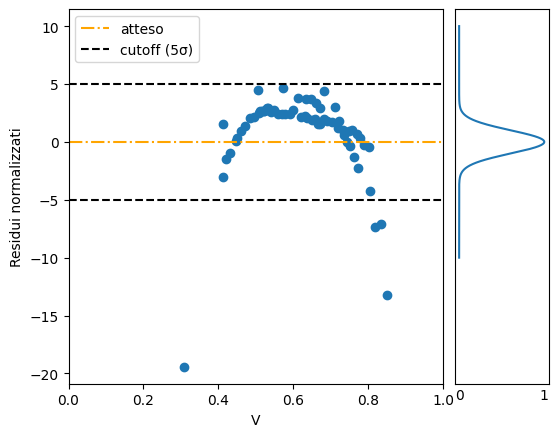

In [33]:
def mostra_residui(I, I_err, model, I0, a, V):
    residuals = (I - model(V,I0,a))/I_err

    for i in range(len(I)):
        if residuals[i] > 5 or residuals[i] < -5: print(i)

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(V, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.hlines(5,0,len(V),color='black',linestyle='--',label='cutoff (5σ)')
    ax.hlines(-5,0,len(V),color='black',linestyle='--')
    ax.set_xlabel("V")
    ax.set_xlim(0, 1)
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-10, 10, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    #print(residuals)

mostra_residui(I3, I_err3perc, model, m.values["I0"], m.values["a"], V3)

In [34]:
I3 = np.delete(I3, (0,9,10,28))
V3 = np.delete(V3, (0,9,10,28))
I_err3perc = np.delete(I_err3perc, (0,9,10,28))

Cutoff dati oltre 3 sigma (da mettere nella relazione)

0
1
2
3
4
5
6
8
19
24


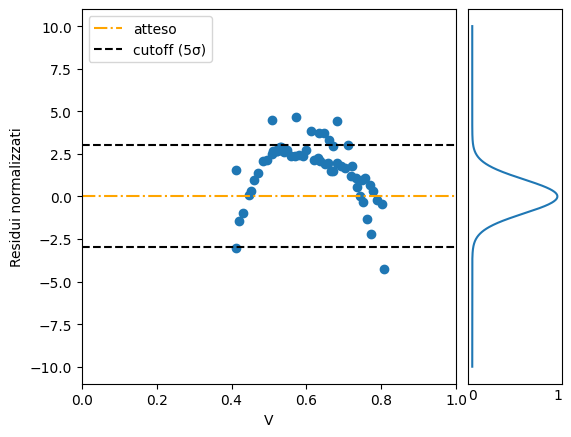

In [35]:
def mostra_residui(I, I_err, model, I0, a, V):
    residuals = (I - model(V,I0,a))/I_err

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(V, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.hlines(3,0,len(V),color='black',linestyle='--',label='cutoff (5σ)')
    ax.hlines(-3,0,len(V),color='black',linestyle='--')
    ax.set_xlabel("V")
    ax.set_xlim(0, 1)
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-10, 10, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    for i in range(len(I)):
        if residuals[i] > 3 or residuals[i] < -3: print(i)

mostra_residui(I3, I_err3perc, model, m.values["I0"], m.values["a"], V3)

In [36]:
I3 = np.delete(I3, (0,1,2,3,4,5,6,8,19,24))
V3 = np.delete(V3, (0,1,2,3,4,5,6,8,19,24))
I_err3perc = np.delete(I_err3perc, (0,1,2,3,4,5,6,8,19,24))

In [37]:
def model(x, I0, a):
    return I0 * (np.e**(a * x) - 1)

minimi_quadrati = LeastSquares(V3, I3, I_err3perc, model)

m = Minuit(minimi_quadrati, I0=10**(-12), a=20)

m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 85.15 (χ²/ndof = 1.8)      │              Nfcn = 209              │
│ EDM = 1.31e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ I0   │  82e-12   │   3e-12   │            │            │         │         │       │
│ 1 │ a    │   26.45   │   0.06    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────────────┐
│    │                 I0                  a │
├────┼───────────────────────────────────────┤
│ I0 │           8.96e-24 -171.667175579e-15 │
│  a │ -171.667175579e-15            0.00342 │
└────┴───────────────────────────────────────┘

p value: 0.0007663031412691312
